<a href="https://colab.research.google.com/github/al34n1x/DataScience/blob/master/99.Machine_Learning/06_classifiers_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Evaluacion de clasificadores



Vamos a crear un conjunto de datos a partir de 2 distribuciones. Cada distribución se etiqueta con una clase. Los valores de ambas se deben cruzar para simular el problema que queremos definir.

In [0]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [0]:
total_p = 1000
total_n = 1000
px = [np.random.normal(10,3) for _ in range(total_p)]
nx = [np.random.normal(20,3) for _ in range(total_n)]
x = np.concatenate([px,nx])
classes = np.concatenate([["p"]*total_p,["n"]*total_n])

In [72]:
x

array([ 8.80645836, 11.56094727, 12.84730723, ..., 15.35284646,
       20.62262827, 21.12556258])

(array([  1.,   1.,   0.,   0.,   4.,   9.,  17.,  20.,  33.,  44.,  67.,
         58.,  69., 121.,  93.,  92.,  91.,  91.,  75.,  50.,  61.,  44.,
         48.,  51.,  86.,  85.,  83.,  68., 108.,  99.,  82.,  68.,  56.,
         49.,  26.,  23.,   9.,  11.,   5.,   2.]),
 array([-0.91290157, -0.16756655,  0.57776847,  1.32310348,  2.0684385 ,
         2.81377352,  3.55910854,  4.30444355,  5.04977857,  5.79511359,
         6.54044861,  7.28578362,  8.03111864,  8.77645366,  9.52178868,
        10.26712369, 11.01245871, 11.75779373, 12.50312875, 13.24846376,
        13.99379878, 14.7391338 , 15.48446882, 16.22980383, 16.97513885,
        17.72047387, 18.46580889, 19.2111439 , 19.95647892, 20.70181394,
        21.44714896, 22.19248397, 22.93781899, 23.68315401, 24.42848903,
        25.17382404, 25.91915906, 26.66449408, 27.4098291 , 28.15516411,
        28.90049913]),
 <a list of 40 Patch objects>)

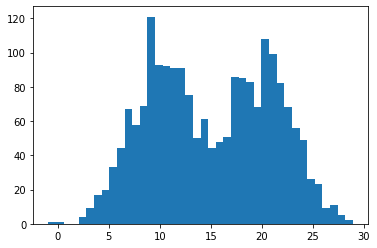

In [73]:
plt.hist(x,bins=40)



Aunque se perciba todo del mismo tipo, tenemos presentes las clases verdaderas

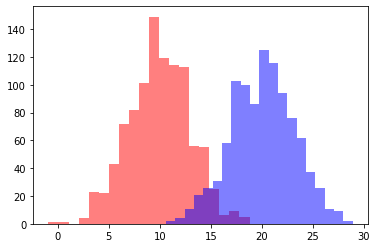

In [74]:
plt.hist(px,bins=20,color="r", alpha = .5)
plt.hist(nx,bins=20,color="blue", alpha = .5)
plt.show()



# 1 modelo simple



Creemos un clasificador muy simple, que divide las clases entre n y p, por la mitad de sus medias. Es decir que indique true para cada valor que es menor que la mitad.

In [75]:
def model(x,threshold):
    model_map = {True:"p",False:"n"}
    result = x<threshold
    result = np.vectorize(model_map.get)(result)
    return result

first_model_threshold = 15
testx = np.arange(1,30)
model(testx,threshold=first_model_threshold)

array(['p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p',
       'p', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n'], dtype='<U1')



Predecimos con nuestro modelo para comprobar su precisión, sobre las clases asignadas

In [0]:
class_predicted = model(x,15)



# Definir metricas



Si contamos en términos generales cuántas se han acertado, es decir, bien clasificadas, se han acertado casi todas. esta es la métrica precision (accuracy).

In [77]:
sum(classes == class_predicted)/len(classes)

0.9515

In [0]:
def accuracy(classes,predicted,positive_class,debug=True):
    if not debug:
        print("Simple implementation")
    return sum(classes == predicted)/len(classes)

In [79]:
accuracy(classes=classes,predicted=class_predicted,positive_class="p")

0.9515

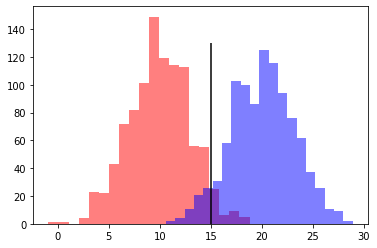

In [80]:
plt.hist(px,bins=20,color="r", alpha = .5)
plt.hist(nx,bins=20,color="blue", alpha = .5)
plt.vlines(first_model_threshold,0,130)
plt.show()



¿Cómo de bueno ha sido distinguiendo las muestras p, de las n ? Para esto necesitamos reflejar sensibilidad (recall) y especificidad (precission)  

Para la Sensibilidad necesitamos dividir todas las clasificadas como p, entre las que existen.

In [81]:
sum((class_predicted == "p") & (classes=="p")) / sum(classes=="p")

0.958

In [0]:
def recall(classes, predicted, positive_class):
    return sum((predicted == positive_class) & (classes==positive_class)) / sum(classes==positive_class)

In [83]:
recall(classes=classes,predicted=class_predicted,positive_class="p")

0.958



Y para la espeficididad, de las que se han señalado como p, cuales lo son realmente

In [84]:
sum((class_predicted == "p") & (classes=="p")) /  sum(class_predicted=="p")

0.945705824284304

In [0]:
def specificity(classes, predicted, positive_class):
    return sum((predicted == positive_class) & (classes==positive_class)) / sum(predicted==positive_class)

In [86]:
specificity(classes, class_predicted, "p")

0.945705824284304



# 3 modelos simples

In [0]:
def model_1(x):
    return model(x,threshold=12.5)
def model_2(x):
    return model(x,threshold=15)
def model_3(x):
    return model(x,threshold=17.5)

In [0]:
class_predicted_1 = model_1(x)
class_predicted_2 = model_2(x)
class_predicted_3 = model_3(x)



modelo 1

In [89]:
print("Precision",accuracy(classes=classes,predicted=class_predicted_1,positive_class="p"))
print("Sensitivity",recall(classes=classes,predicted=class_predicted_1,positive_class="p"))
print("Specificity",specificity(classes=classes,predicted=class_predicted_1,positive_class="p"))

Precision 0.8985
Sensitivity 0.804
Specificity 0.9913686806411838




modelo 2

In [90]:
print("Precision",accuracy(classes=classes,predicted=class_predicted_2,positive_class="p"))
print("Sensitivity",recall(classes=classes,predicted=class_predicted_2,positive_class="p"))
print("Specificity",specificity(classes=classes,predicted=class_predicted_2,positive_class="p"))

Precision 0.9515
Sensitivity 0.958
Specificity 0.945705824284304




modelo 3

In [91]:
print("Precision",accuracy(classes=classes,predicted=class_predicted_3,positive_class="p"))
print("Sensitivity",recall(classes=classes,predicted=class_predicted_3,positive_class="p"))
print("Specificity",specificity(classes=classes,predicted=class_predicted_3,positive_class="p"))

Precision 0.895
Sensitivity 0.993
Specificity 0.830267558528428


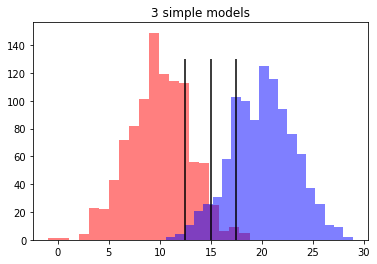

In [92]:
plt.hist(px,bins=20,color="r", alpha = .5)
plt.hist(nx,bins=20,color="blue", alpha = .5)
plt.title("3 simple models")
plt.vlines(12.5,0,130)
plt.vlines(15,0,130)
plt.vlines(17.5,0,130)

plt.show()



# muchos modelos simples



Creamos ahora "modelos" con unmbrales del 5 al 25 de 2 en dos, e introducimos las métricas en listas para comprobar como de bien evolucionan las 3 métricas

In [93]:
thresholds = np.arange(5,27,2)
thresholds

array([ 5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25])

In [94]:
predictions = [model(x,threshold=t) for t in thresholds]
predictions

[array(['n', 'n', 'n', ..., 'n', 'n', 'n'], dtype='<U1'),
 array(['n', 'n', 'n', ..., 'n', 'n', 'n'], dtype='<U1'),
 array(['p', 'n', 'n', ..., 'n', 'n', 'n'], dtype='<U1'),
 array(['p', 'n', 'n', ..., 'n', 'n', 'n'], dtype='<U1'),
 array(['p', 'p', 'p', ..., 'n', 'n', 'n'], dtype='<U1'),
 array(['p', 'p', 'p', ..., 'n', 'n', 'n'], dtype='<U1'),
 array(['p', 'p', 'p', ..., 'p', 'n', 'n'], dtype='<U1'),
 array(['p', 'p', 'p', ..., 'p', 'n', 'n'], dtype='<U1'),
 array(['p', 'p', 'p', ..., 'p', 'p', 'n'], dtype='<U1'),
 array(['p', 'p', 'p', ..., 'p', 'p', 'p'], dtype='<U1'),
 array(['p', 'p', 'p', ..., 'p', 'p', 'p'], dtype='<U1')]

In [0]:
accuracies = [accuracy(classes=classes, predicted= ps, positive_class="p")
             for ps in predictions]
recalls = [recall(classes=classes, predicted= ps, positive_class="p")
             for ps in predictions]
specificities = [specificity(classes=classes, predicted= ps, positive_class="p")
             for ps in predictions]
    

In [96]:
recalls

[0.051, 0.168, 0.361, 0.626, 0.855, 0.958, 0.99, 1.0, 1.0, 1.0, 1.0]

In [97]:
specificities

[1.0,
 1.0,
 1.0,
 0.9984051036682615,
 0.986159169550173,
 0.945705824284304,
 0.8669001751313485,
 0.7309941520467836,
 0.6191950464396285,
 0.5485463521667581,
 0.5141388174807198]

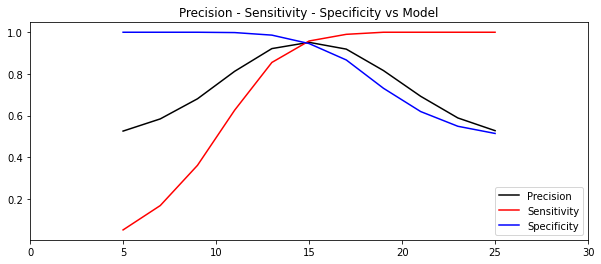

In [98]:
plt.figure(figsize=[10,4])
plt.xlim([0,30])
plt.plot(thresholds,accuracies,"k")
plt.plot(thresholds,recalls,"red")
plt.plot(thresholds,specificities,"blue")
plt.legend(["Precision","Sensitivity","Specificity"])
plt.title("Precision - Sensitivity - Specificity vs Model")


plt.show()

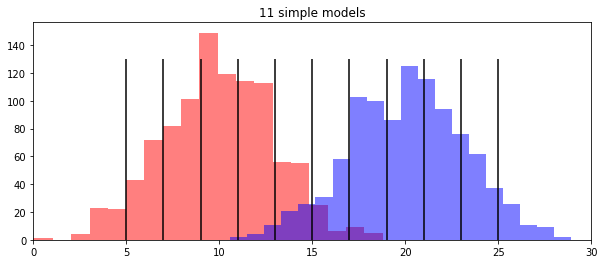

In [99]:
plt.figure(figsize=[10,4])
plt.xlim([0,30])

plt.hist(px,bins=20,color="r", alpha = .5)
plt.hist(nx,bins=20,color="blue", alpha = .5)
for t in thresholds:
    plt.vlines(t, 0, 130)
plt.title("11 simple models")
plt.show()



# ROC



para N modelos distintos, cada uno posiblemente con un nivel de umbral de aceptación de la clase positiva, se representan sus valores de True Positive Rate y False Positive Rate.

TPR = De los casos seleccionados, tasa de los que eran realmente positivos  
FPR = De los casos seleccionados, tasa de los que se han dado por positivos pero no lo eran


In [0]:
TPR = recalls

FPR = 1 - np.array(specificities)

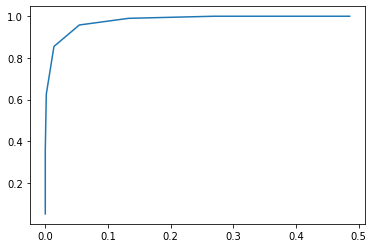

In [101]:
plt.plot(FPR,TPR)
plt.show()



# Otras distribuciones



## Clases desequilibradas

In [0]:
total_p = 100
total_n = 1000
px = [np.random.normal(10,3) for _ in range(total_p)]
nx = [np.random.normal(20,3) for _ in range(total_n)]
x = np.concatenate([px,nx])
classes = np.concatenate([["p"]*total_p,["n"]*total_n])

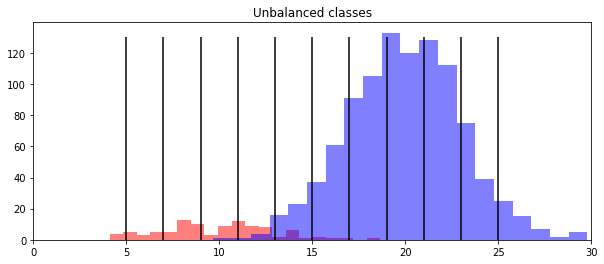

In [103]:
plt.figure(figsize=[10,4])
plt.xlim([0,30])
plt.title("Unbalanced classes")
plt.hist(px,bins=20,color="r", alpha = .5)
plt.hist(nx,bins=20,color="blue", alpha = .5)
for t in thresholds:
    plt.vlines(t, 0, 130)

plt.show()

In [0]:
predictions = [model(x,threshold=t) for t in thresholds]
accuracies = [accuracy(classes=classes, predicted= ps, positive_class="p")
             for ps in predictions]
recalls = [recall(classes=classes, predicted= ps, positive_class="p")
             for ps in predictions]
specificities = [specificity(classes=classes, predicted= ps, positive_class="p")
             for ps in predictions]
    

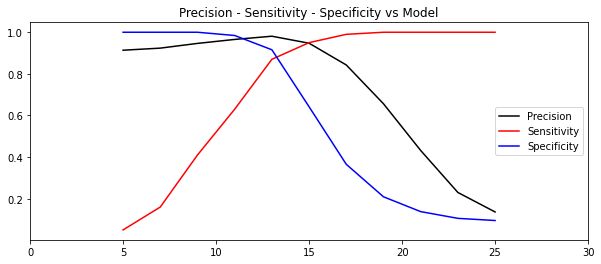

In [105]:
plt.figure(figsize=[10,4])
plt.xlim([0,30])
plt.plot(thresholds,accuracies,"k")
plt.plot(thresholds,recalls,"red")
plt.plot(thresholds,specificities,"blue")
plt.legend(["Precision","Sensitivity","Specificity"])
plt.title("Precision - Sensitivity - Specificity vs Model")
plt.show()



## Distribuciones muy pegadas

In [0]:
total_p = 1000
total_n = 1000
px = [np.random.normal(13,3) for _ in range(total_p)]
nx = [np.random.normal(17,3) for _ in range(total_n)]
x = np.concatenate([px,nx])
classes = np.concatenate([["p"]*total_p,["n"]*total_n])

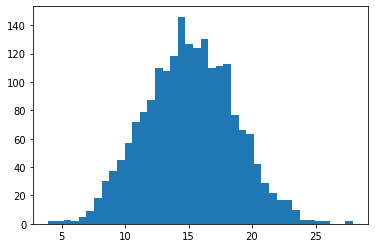

In [107]:
plt.hist(x,bins=40)
plt.show()

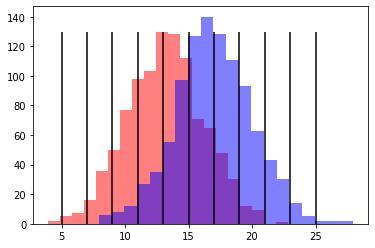

In [108]:
plt.hist(px,bins=20,color="r", alpha = .5)
plt.hist(nx,bins=20,color="blue", alpha = .5)
for t in thresholds:
    plt.vlines(t, 0, 130)

plt.show()

In [0]:
predictions = [model(x,threshold=t) for t in thresholds]
accuracies = [accuracy(classes=classes, predicted= ps, positive_class="p")
             for ps in predictions]
recalls = [recall(classes=classes, predicted= ps, positive_class="p")
             for ps in predictions]
specificities = [specificity(classes=classes, predicted= ps, positive_class="p")
             for ps in predictions]
    

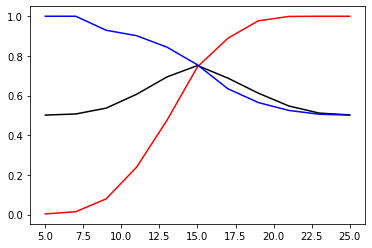

In [110]:
plt.plot(thresholds,accuracies,"k")
plt.plot(thresholds,recalls,"red")
plt.plot(thresholds,specificities,"blue")
plt.show()



# Un modelo "real"



Ahora probamos con un modelo entrenado como una regresión lineal

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
total_p = 1000
total_n = 1000
px = [np.random.normal(10,3) for _ in range(total_p)] 
nx = [np.random.normal(20,3) for _ in range(total_n)]
x = np.concatenate([px,nx])
classes = np.concatenate([["p"]*total_p,["n"]*total_n])

In [0]:
lr = LogisticRegression()
lr = lr.fit(x.reshape(-1,1),classes)



Ahora predecimos con él

In [0]:
predicted_classes = lr.predict(x.reshape(-1,1))

In [115]:
accuracy(classes=classes,predicted=predicted_classes,positive_class="p")

0.9495

In [116]:
recall(classes=classes,predicted=predicted_classes,positive_class="p")

0.95

In [117]:
specificity(classes=classes,predicted=predicted_classes,positive_class="p")

0.949050949050949



## Sensibilidad en los modelos



Por defecto, la probabilidad > .5 se asigna a la primera clase. Pero podemos elegir el umbral que queramos, si interpretamos la salida como probabilidades y elegimos varios umbrales, para ver como respoden.

In [0]:
predicted_classes_proba = lr.predict_proba(x.reshape(-1,1))

n_proba, p_proba = zip(*predicted_classes_proba)

In [119]:
print(classes[0:10])
print(x[0:10])
print(p_proba[0:10])

['p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p']
[11.56130325 11.050353    7.57730308 11.38444699  8.74277258  8.34523592
 12.54454252 15.64679272 11.52066442  6.4137425 ]
(0.9789316751091877, 0.9879962507107953, 0.9997507755536316, 0.9826489448269223, 0.9990822908505331, 0.9994116308288137, 0.9392558280500547, 0.3245159740417981, 0.9798494469151984, 0.9999322058455323)


In [120]:
np.array(n_proba)+np.array(p_proba)

array([1., 1., 1., ..., 1., 1., 1.])



La probabilidad asignada para cada x serán las siguientes

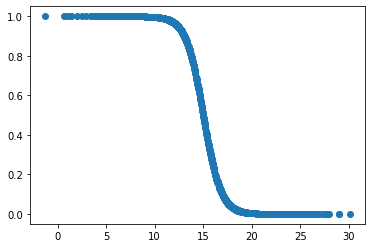

In [121]:
plt.scatter(x, p_proba)
plt.show()



Creemos modelos del .1 al .9 de umbral de probabilidad, y comprobemos sus evaluaciones

In [122]:
thresholds = np.arange(1,10)[::-1]/10
thresholds

array([0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])

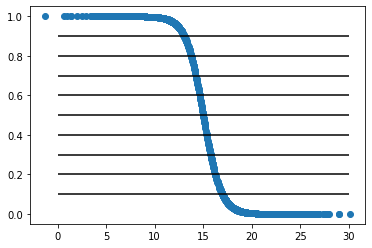

In [123]:
plt.scatter(x, p_proba)
plt.hlines(thresholds,0,30)
plt.show()



Para cada threshold, tenemos un modelo, de manera que podemos discernir que clasificación ha hecho, aplicando el filtro del umbral.

In [0]:
predictions_model0 = p_proba>thresholds[0]
predictions_model0 = list(map(lambda x: "p" if x else "n",predictions_model0))



Para todos los modelos

In [125]:
print(thresholds)
predictions = [np.array(list(map(lambda x: "p" if x else "n", p_proba > t_ ))) for t_ in thresholds ]

[0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]


In [0]:
accuracies = [accuracy(classes=classes, predicted=pred_, positive_class="p") 
                for pred_ in predictions]
recalls = [recall(classes=classes, predicted=pred_, positive_class="p") 
                for pred_ in predictions]
specificities = [specificity(classes=classes, predicted=pred_, positive_class="p") 
                for pred_ in predictions]

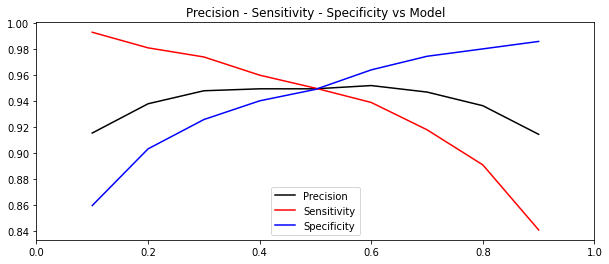

In [127]:
plt.figure(figsize=[10,4])
plt.xlim([0,1])
#plt.ylim([0,1])
plt.plot(thresholds,accuracies,"k")
plt.plot(thresholds,recalls,"red")
plt.plot(thresholds,specificities,"blue")
plt.legend(["Precision","Sensitivity","Specificity"])
plt.title("Precision - Sensitivity - Specificity vs Model")
plt.show()



## Más sensibilidad

In [0]:
thresholds = np.arange(0,1000,10)[::-1]/1000
predictions = [np.array(list(map(lambda x: "p" if x else "n", p_proba > t_ ))) for t_ in thresholds ]

accuracies = [accuracy(classes=classes, predicted=pred_, positive_class="p") 
                for pred_ in predictions]
recalls = [recall(classes=classes, predicted=pred_, positive_class="p") 
                for pred_ in predictions]
specificities = [specificity(classes=classes, predicted=pred_, positive_class="p") 
                for pred_ in predictions]

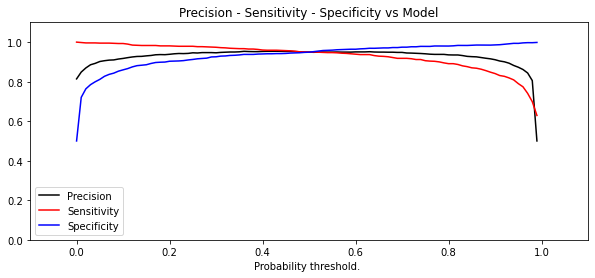

In [129]:
plt.figure(figsize=[10,4])
plt.xlim([-.1,1.1])
plt.ylim([0,1.1])
plt.plot(thresholds[::-1],accuracies,"k")
plt.plot(thresholds,recalls,"red")
plt.plot(thresholds,specificities,"blue")
plt.legend(["Precision","Sensitivity","Specificity"])
plt.title("Precision - Sensitivity - Specificity vs Model")
plt.xlabel("Probability threshold. ")
plt.show()



## Distribuciones desequilibradas

In [0]:
total_p = 100
total_n = 1000
px = [np.random.normal(10,3) for _ in range(total_p)]
nx = [np.random.normal(20,3) for _ in range(total_n)]
x = np.concatenate([px,nx])
classes = np.concatenate([["p"]*total_p,["n"]*total_n])

In [0]:
lr = LogisticRegression()
lr = lr.fit(x.reshape(-1,1),classes)

predicted_classes_proba = lr.predict_proba(x.reshape(-1,1))

n_proba, p_proba = zip(*predicted_classes_proba)

In [0]:
thresholds = np.arange(0,1000,10)[::-1]/1000
predictions = [np.array(list(map(lambda x: "p" if x else "n", p_proba > t_ ))) for t_ in thresholds ]

accuracies = [accuracy(classes=classes, predicted=pred_, positive_class="p") 
                for pred_ in predictions]
recalls = [recall(classes=classes, predicted=pred_, positive_class="p") 
                for pred_ in predictions]
specificities = [specificity(classes=classes, predicted=pred_, positive_class="p") 
                for pred_ in predictions]

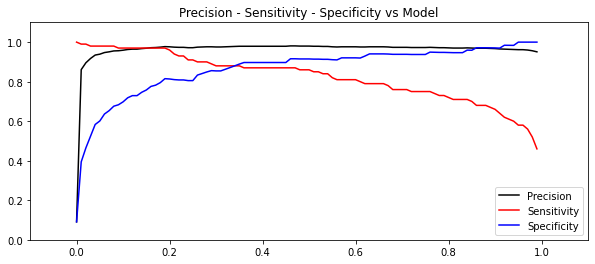

In [133]:
plt.figure(figsize=[10,4])
plt.xlim([-.1,1.1])
plt.ylim([0,1.1])
plt.plot(thresholds,accuracies,"k")
plt.plot(thresholds,recalls,"red")
plt.plot(thresholds,specificities,"blue")
plt.legend(["Precision","Sensitivity","Specificity"])
plt.title("Precision - Sensitivity - Specificity vs Model")
plt.show()

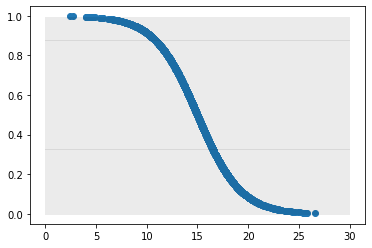

In [139]:
plt.scatter(x, p_proba)
plt.hlines(thresholds, 0, 30, alpha=0.1)
plt.show()



## Distribuciones muy pegadas

In [0]:
total_p = 1000
total_n = 1000
px = [np.random.normal(13,3) for _ in range(total_p)]
nx = [np.random.normal(17,3) for _ in range(total_n)]
x = np.concatenate([px,nx])
classes = np.concatenate([["p"]*total_p,["n"]*total_n])

In [0]:
lr = LogisticRegression()
lr = lr.fit(x.reshape(-1,1),classes)

predicted_classes_proba = lr.predict_proba(x.reshape(-1,1))

n_proba, p_proba = zip(*predicted_classes_proba)

In [0]:
thresholds = np.arange(0,1000,10)[::-1]/1000
predictions = [np.array(list(map(lambda x: "p" if x else "n", p_proba > t_ ))) for t_ in thresholds ]

accuracies = [accuracy(classes=classes, predicted=pred_, positive_class="p") 
                for pred_ in predictions]
recalls = [recall(classes=classes, predicted=pred_, positive_class="p") 
                for pred_ in predictions]
specificities = [specificity(classes=classes, predicted=pred_, positive_class="p") 
                for pred_ in predictions]

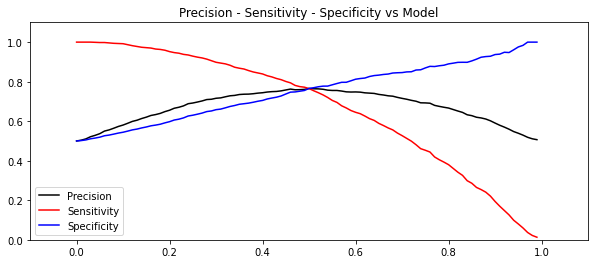

In [138]:
plt.figure(figsize=[10,4])
plt.xlim([-.1,1.1])
plt.ylim([0,1.1])
plt.plot(thresholds,accuracies,"k")
plt.plot(thresholds,recalls,"red")
plt.plot(thresholds,specificities,"blue")
plt.legend(["Precision","Sensitivity","Specificity"])
plt.title("Precision - Sensitivity - Specificity vs Model")
plt.show()